In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sns.set_style("darkgrid", rc=custom_style)

# inirialize random number generator
np.random.seed(123)

# true parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# size of dataset
size = 100

# predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# simulate outcome variable
Y =alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma



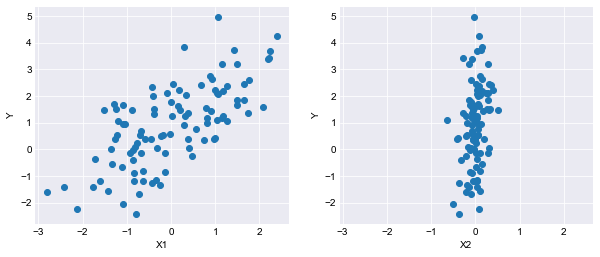

In [2]:
fig, axes = plt.subplots(1,2, sharex=True, figsize=(10,4))
axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)
axes[0].set_ylabel('Y')
axes[0].set_xlabel('X1')
axes[1].set_ylabel('Y')
axes[1].set_xlabel('X2')

In [4]:
import pymc3 as pm

basic_model = pm.Model()

with basic_model:
    
    # priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10, shape=2)
    sigma = pm.HalfNormal('sigma', sd=1)
    
    # expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2
    
    # LikeLihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

In [5]:
map_estimate = pm.find_MAP(model=basic_model)
map_estimate

logp = -149.58, ||grad|| = 12.242: 100%|██████████| 19/19 [00:00<00:00, 68.87it/s]  


{'alpha': array(0.9066009314912588),
 'beta': array([ 0.94848596,  2.60711845]),
 'sigma': array(0.9629885768973849)}

In [7]:
from scipy import optimize

with basic_model:
    
    trace = pm.sample()
    trace['alpha'][-5:]

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [01:21<00:00, 11.63it/s]


In [8]:
trace['alpha'][-5:]

array([ 0.91876297,  0.87876932,  0.95650738,  0.9420305 ,  1.0249928 ])

In [9]:
with basic_model:
    
    start = pm.find_MAP(fmin=optimize.fmin_powell)
    
    step = pm.Slice()
    
    trace = pm.sample(5000, step=step, start=start)

/Users/yk/.virtualenvs/cv/lib/python3.6/site-packages/pymc3/tuning/starting.py:91: UserWarning: In future versions, set the optimization algorithm with a string. For example, use `method="L-BFGS-B"` instead of `fmin=sp.optimize.fmin_l_bfgs_b"`.
  warnings.warn('In future versions, set the optimization algorithm with a string. '
logp = -149.47:   4%|▎         | 176/5000 [00:00<00:20, 230.64it/s]


Optimization terminated successfully.
         Current function value: 148.984564
         Iterations: 4
         Function evaluations: 176


100%|██████████| 5500/5500 [09:12<00:00,  9.96it/s]


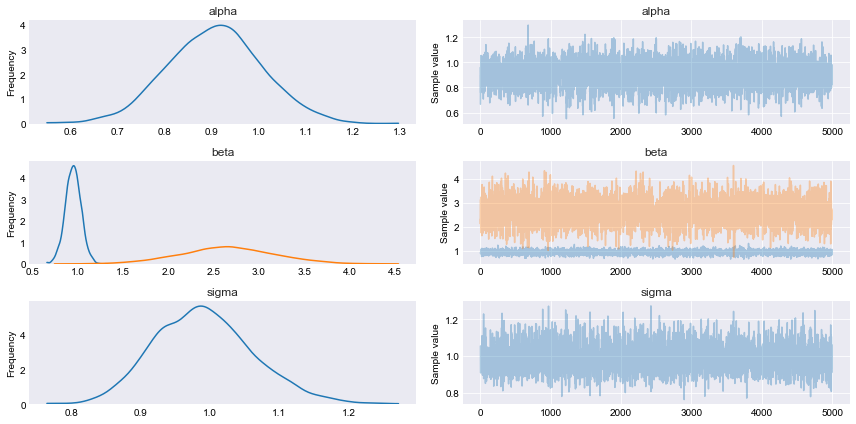

In [10]:
_ = pm.traceplot(trace)

In [11]:
pm.summary(trace)


alpha:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.906            0.100            0.001            [0.717, 1.109]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.709          0.839          0.907          0.971          1.102


beta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.948            0.086            0.001            [0.766, 1.110]
  2.655            0.514            0.008            [1.646, 3.670]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.775          0.891          0.948          1.005          1.120
  1.647          2.322          2.653   

100%|██████████| 1000500/1000500 [13:46<00:00, 1210.45it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115add198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11648b198>]], dtype=object)

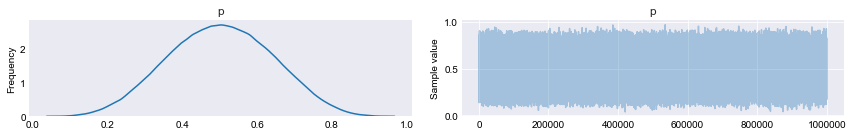

In [12]:
import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sns.set_style("darkgrid", rc=custom_style)

observed = [1, 0, 1, 1, 0, 1, 0, 1, 0, 0]
h = sum(observed)
n = len(observed)
alpha, beta = 1, 1
niter = 10 ** 6
with pm.Model() as model:
    # define priors
    p = pm.Beta('p', alpha=alpha, beta=beta)
    
    # define likelihood
    y = pm.Binomial('y', n=n, p=p, observed=h)
    
    # inference
    start = {'p': 0.5}
    step = pm.Metropolis()
    trace = pm.sample(niter, step, start)

pm.traceplot(trace)


In [14]:
N = 10000
p, bins = np.histogram(trace["p"], bins=N, density=True)
theta = np.linspace(np.min(bins), np.max(bins), N)
print("ML: " + str(h / float(n)))
print("MCMC: " + str(np.dot(p, theta) / N))

ML: 0.5
MCMC: 0.538390530782


In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sns.set_style("darkgrid", rc=custom_style)

import pymc3 as pm
# from pymc3 import Beta, Binomial, Bernoulli, Model, Deterministic
# from pymc3 import traceplot, sample, summary
import theano
theano.config.warn.round = False

# Initialize random number generator
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

WARNING (theano.configdefaults): Only clang++ is supported. With g++, we end up with strange g++/OSX bugs.
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


In [2]:
basic_model = pm.Model()

with basic_model:
    
    # priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10, shape=2)
    sigma = pm.HalfNormal('sigma', sd=1)
    
    # expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2
    
    # likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

